In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime


In [2]:
!wget -O data.csv https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv

--2021-10-25 01:41:11--  https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5321884 (5.1M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.08M  --.-KB/s    in 0.03s   

2021-10-25 01:41:12 (174 MB/s) - ‘data.csv’ saved [5321884/5321884]



In [3]:
file = pd.read_csv('data.csv', delimiter=";")
file.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [4]:
file['LAMA CICILAN'].value_counts()

35.0    6703
23.0    2348
11.0     913
29.0     420
17.0     404
33.0      64
30.0      39
32.0      15
34.0       9
36.0       3
13.0       2
19.0       2
2.0        2
24.0       2
31.0       1
3.0        1
Name: LAMA CICILAN, dtype: int64

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SALES DATE              18616 non-null  object 
 1   TYPE MOTOR              18616 non-null  object 
 2   COLOR                   18616 non-null  object 
 3   KODE CUSTOMER           18616 non-null  object 
 4   JENIS KELAMIN           18616 non-null  object 
 5   TANGGAL LAHIR           18616 non-null  object 
 6   KECAMATAN SURAT         18616 non-null  object 
 7   KOTA SURAT              18616 non-null  object 
 8   PROPINSI                18616 non-null  object 
 9   STATUS RUMAH            18616 non-null  object 
 10  JENIS PENJUALAN STNK    18616 non-null  object 
 11  JENIS PENJUALAN SSU     18616 non-null  object 
 12  BESAR DP                10928 non-null  float64
 13  BESAR CICILAN           10928 non-null  float64
 14  LAMA CICILAN            10928 non-null

In [ ]:
file_new = file[['SALES DATE','TYPE MOTOR']]
file_new

,SALES DATE,TYPE MOTOR
0,08/08/2019,REVO FIT FI
1,16/10/2019,REVO FIT FI
2,07/10/2019,REVO FIT FI
3,09/09/2019,REVO FIT FI
4,07/10/2019,REVO FIT FI
...,...,...
18611,10/04/2019,CBR 250RR STD
18612,02/08/2019,CBR 250RR ABS
18613,29/07/2019,CBR 250RR ABS
18614,15/03/2019,SUPER CUB C125


In [ ]:
file_new = file_new.rename(columns={'SALES DATE': 'sales_date', 'TYPE MOTOR': 'jumlah_penjualan'})
file_new

,sales_date,jumlah_penjualan
0,08/08/2019,REVO FIT FI
1,16/10/2019,REVO FIT FI
2,07/10/2019,REVO FIT FI
3,09/09/2019,REVO FIT FI
4,07/10/2019,REVO FIT FI
...,...,...
18611,10/04/2019,CBR 250RR STD
18612,02/08/2019,CBR 250RR ABS
18613,29/07/2019,CBR 250RR ABS
18614,15/03/2019,SUPER CUB C125


In [ ]:
file_new['sales_date'] = pd.to_datetime(file_new['sales_date'])
file_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_date        18616 non-null  datetime64[ns]
 1   jumlah_penjualan  18616 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 291.0+ KB


In [ ]:
file_new.sort_values(by=["sales_date"], inplace=True)
file_new

,sales_date,jumlah_penjualan
17285,2017-01-11,NEW VARIO 150
17286,2017-02-08,NEW VARIO 150
17287,2017-02-08,NEW VARIO 150
17284,2017-02-08,NEW VARIO 150
17282,2017-04-11,NEW VARIO 150
...,...,...
6342,2019-12-10,VARIO 150
4682,2019-12-10,GENIO CBS ISS
3910,2019-12-10,VARIO 125 CBS
5353,2019-12-10,PCX 150 CBS


In [ ]:
date_initial = '2019-01-01'
file_new = file_new[file_new['sales_date'] >= date_initial]
file_new

,sales_date,jumlah_penjualan
17995,2019-01-06,VARIO 150
17989,2019-01-06,VARIO 150
18390,2019-01-06,VARIO 150
18189,2019-01-06,VARIO 150
18264,2019-01-06,VARIO 150
...,...,...
6342,2019-12-10,VARIO 150
4682,2019-12-10,GENIO CBS ISS
3910,2019-12-10,VARIO 125 CBS
5353,2019-12-10,PCX 150 CBS


In [ ]:
file_new = file_new.groupby('sales_date').count()
file_new

,jumlah_penjualan
sales_date,
2019-01-06,6
2019-01-07,29
2019-01-08,98
2019-01-10,28
2019-01-19,2
...,...
2019-12-06,81
2019-12-07,84
2019-12-08,263


In [ ]:
file_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2019-01-06 to 2019-12-10
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   jumlah_penjualan  178 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


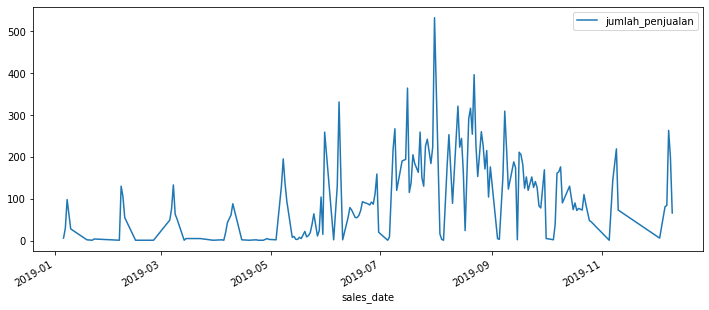

In [ ]:
file_new.plot(figsize=(12,5))

In [ ]:
file_new['jumlah_penjualan']

sales_date
2019-01-06      6
2019-01-07     29
2019-01-08     98
2019-01-10     28
2019-01-19      2
             ... 
2019-12-06     81
2019-12-07     84
2019-12-08    263
2019-12-09    198
2019-12-10     66
Name: jumlah_penjualan, Length: 178, dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(file_new['jumlah_penjualan'])

1. ADF :  -2.4499599504842298
2. P-Value :  0.12812898492226515
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 171
5. Critical Values :
	 1% :  -3.4691814633722453
	 5% :  -2.878595143532943
	 10% :  -2.5758625549741803


In [ ]:
print(file_new.shape)
train=file_new.iloc[:-30]
test=file_new.iloc[-30:]
print(train.shape,test.shape)

(178, 1)
(148, 1) (30, 1)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['jumlah_penjualan'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored